# Using and updating GIS content

The GIS is a warehouse of geographic content and services. ArcGIS includes several classes to make use of this content, publish new items and update them when needed. This sample on updating the content of web maps and web scenes will demonstrate the following
 * **Replace web layers** of a web map. For instance, you can use this to update a web map when the services it points to were deleted. The sample shows how to Create a web feature layer as a **FeatureService** object and perform operations on it.
 * **Drive the map widget by code**. In addition to displaying the interactive map widget, you can also set it to load at a particular extent. This is great for presentation purposes. During this process, the sample shows how to create and use a **Map** object.
 * Make a **copy of a public web scene** item into your contents and then update it.
     * Edit the list of layers to remove unnecessary ones.
     * **Replace the basemap** of the web scene. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
   <ul class="toc-item">
      <li><span><a href="#Using-and-updating-GIS-content" data-toc-modified-id="Using-and-updating-GIS-content-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using and updating GIS content</a></span></li>
      <li>
         <span><a href="#Creating-a-web-map-and-feature-layer" data-toc-modified-id="Using-and-updating-a-web-map-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating a web map and feature layer</a></span>
         <ul class="toc-item">
            <li><span><a href="#Create-a-feature-layer" data-toc-modified-id="Fix-errors-in-web-map-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create a feature layer</a></span></li>
            <li><span><a href="#Create-WebMap,-Add-Layer,-and-Save" data-toc-modified-id="Update-the-web-map-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create WebMap, Add Layer, and Save</a></span></li>
            <li><span><a href="#Delete-Feature-Layer-and-re-publish" data-toc-modified-id="Update-the-web-map-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Delete Feature Layer and re-publish</a></span></li>
         </ul>
      </li>
      <li>
         <span><a href="#Using-and-updating-a-web-map" data-toc-modified-id="Using-and-updating-a-web-map-2"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using and updating a web map</a></span>
         <ul class="toc-item">
            <li><span><a href="#Fix-errors-in-web-map" data-toc-modified-id="Fix-errors-in-web-map-2.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fix errors in web map</a></span></li>
            <li><span><a href="#Update-the-web-map" data-toc-modified-id="Update-the-web-map-2.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Update the web map</a></span></li>
         </ul>
      </li>
      <li>
         <span><a href="#Using-and-updating-a-web-scene" data-toc-modified-id="Using-and-updating-a-web-scene-3"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using and updating a web scene</a></span>
         <ul class="toc-item">
            <li>
               <span><a href="#Make-a-copy-of-the-public-web-scene-item" data-toc-modified-id="Make-a-copy-of-the-public-web-scene-item-3.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Make a copy of the public web scene item</a></span>
               <ul class="toc-item">
                  <li><span><a href="#Update-layers-of-new-web-scene" data-toc-modified-id="Update-operational-layers-of-new-web-scene-3.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Update layers of new web scene</a></span></li>
                  <li><span><a href="#Update-basemap-of-new-web-scene" data-toc-modified-id="Update-basemap-of-new-web-scene-3.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Update basemap of new web scene</a></span></li>
               </ul>
            </li>
         </ul>
      </li>
      <li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li>
   </ul>
</div>

In [2]:
from arcgis.gis import GIS, ItemTypeEnum
from arcgis.map import Map, Scene
from IPython.display import display

gis = GIS(profile="your_online_profile")

## Creating a web map and feature layer
We will will create a feature layer and a web map. We will then delete the feature layer and re-publish. This will change the service and leave us with a broken layer inside our map, don't worry we will fix this in the next steps.

### Create a feature layer

In [3]:
my_csv = 'data/updating_gis_content/capitals_1.csv'
item_prop = {'title':'USA Capitals spreadsheet for WebMap', 'type':'CSV'}

In [6]:
folder = gis.content.folders.get()
csv_item = folder.add(item_properties = item_prop, file=my_csv).result()

<Item title:"USA Capitals spreadsheet for WebMap" type:CSV owner:arcgis_python>

In [34]:
feature_service_list = gis.content.search("title:'USA Capitals spreadsheet for WebMap' , type:Feature Service")

In the cell below we are publishing the *csv_item*. But before we do that we should check if the *csv_item* is already published. If it's already published then we'll not publish it again and retrieve the already published item

In [35]:
capitals_item = None
if not feature_service_list:
    capitals_item = csv_item.publish()
else:
    capitals_item = feature_service_list[0]

<Item title:"USA Capitals spreadsheet for WebMap" type:Feature Layer Collection owner:arcgis_python>
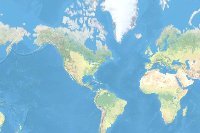

In [36]:
capitals_item

### Create WebMap, Add Layer, and Save

In [17]:
wm = Map()
wm.content.add(capitals_item)
wm.save({"title": "USA Capitals WebMap", "tags": ["python", "webmap"], "snippet": "A webmap that contains USA capitals as a feature layer."})

<Item title:"USA Capitals WebMap" type:Web Map owner:arcgis_python>

### Delete Feature Layer and re-publish
In the following cell we'll delete the *capitals_item* to demonstrates how some feature layers can get deleted without us realizing that they are part of webmaps. 

In [37]:
capitals_item.delete(permanent=True)

True

In the upcoming cells we will get the webmap and see that the layer does not show up!   
This sample can then guide you to fix this problem of missing layers.

## Using and updating a web map
We will search for that web map that has broken layers, render it on the notebook and update it.

In [39]:
search_result = gis.content.search("title:USA Capitals WebMap", item_type = "Web Map")
display(search_result)

[<Item title:"USA Capitals" type:Web Map owner:arcgis_python>]

Read the web map as a `WebMap` object

In [40]:
wm_item = search_result[0]
web_map_obj = Map(item=wm_item)


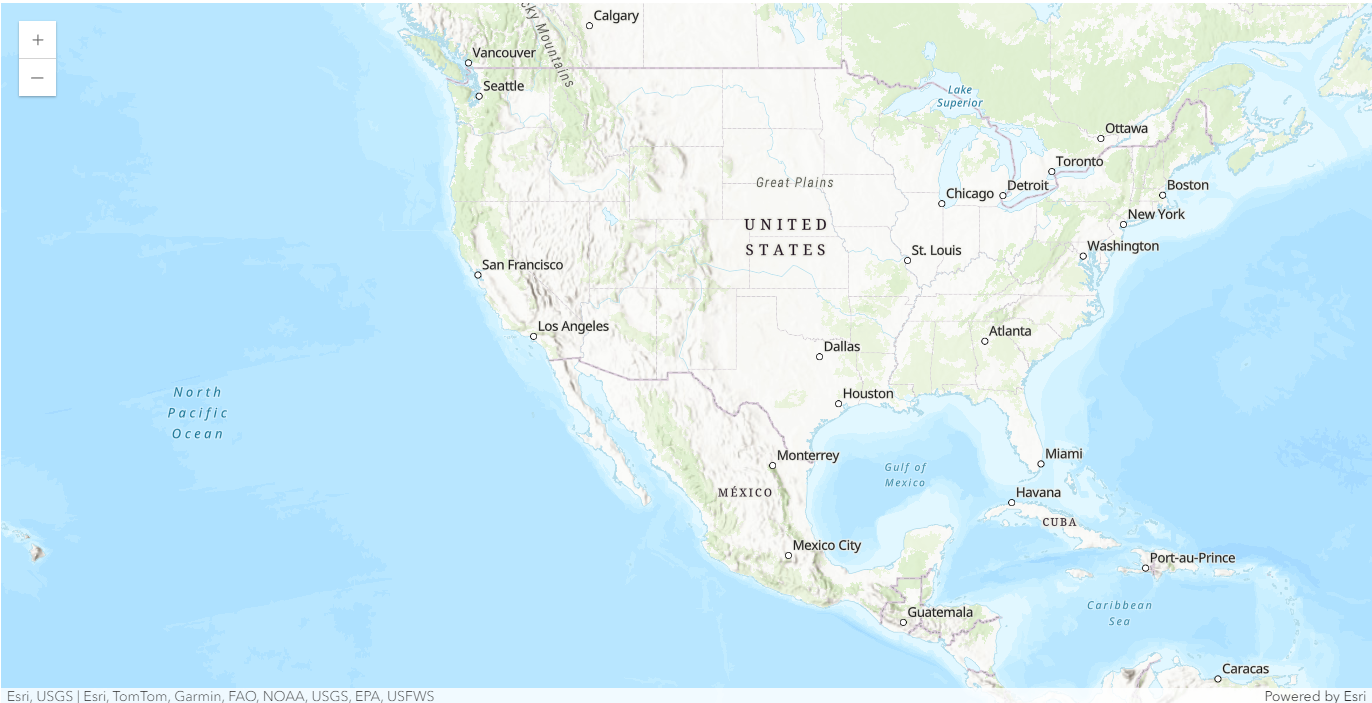

In [46]:
web_map_obj

### Fix errors in web map
The widget loads an empty web map with just a basemap. Let us investigate the contents of the web map to determine the issue. You can query the layers in the web map using the `layers` property of `MapContent` class

In [41]:
web_map_obj.content.layers

[<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/USA_Capitals_spreadsheet_for_WebMap/FeatureServer/0">]

The above layer is just a basemap layer and there are no feature layers in the content layers list 

### Update the web map
To update the web map, we call the `update()` method. You have the option to update the thumbnail or any other item properties at this time.

<Item title:"USA Capitals spreadsheet for WebMap" type:Feature Layer Collection owner:arcgis_python>
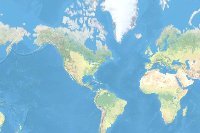

In [43]:
new_capitals = csv_item.publish()
new_capitals 

In [44]:
web_map_obj.update(item_properties={'title':'USA Capitals - updated'},
                  thumbnail = "./data/webmap_thumbnail.png")

True

Now we see that the web map is is rendering the layer properly after re-publishing the item


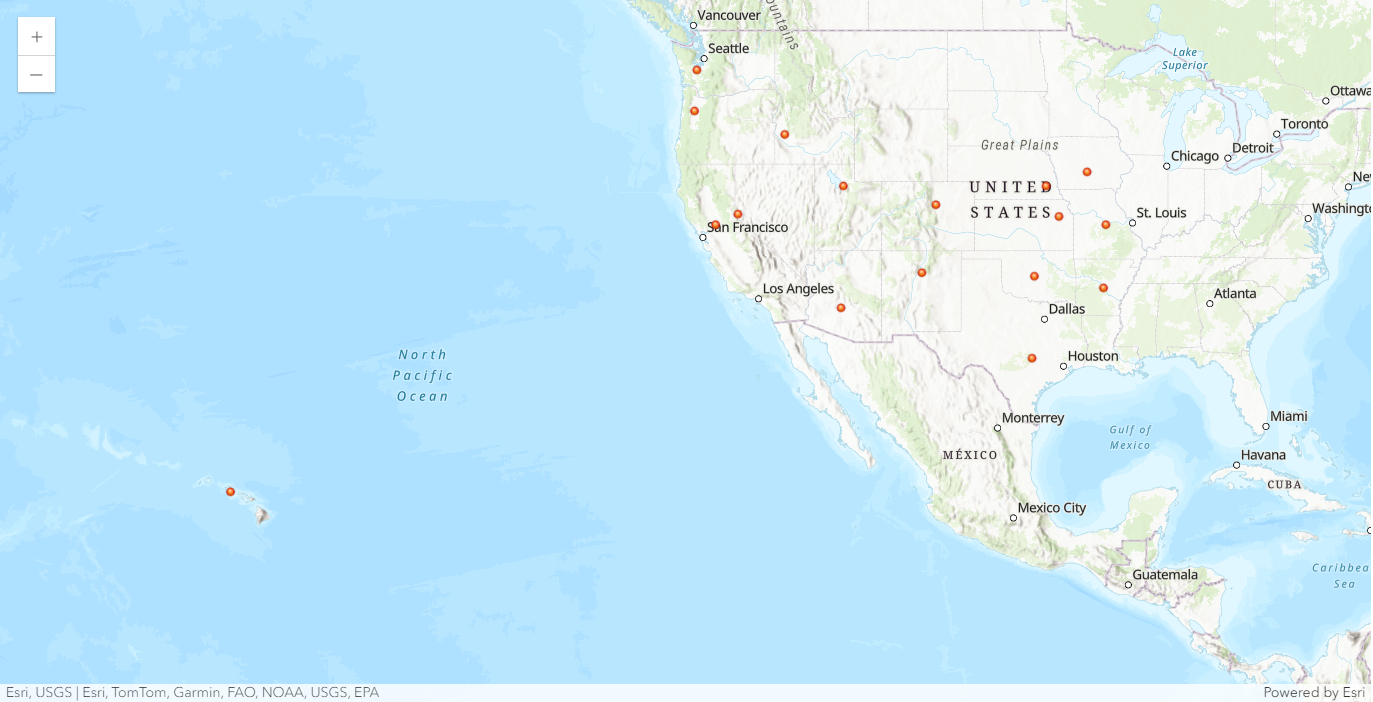

In [47]:
web_map_obj

The web map was sucessfully overwritten with correct operational layers. You can interact with the widget and zoom into the USA to observe the locations of capitals. Let's clean it up so we can always run this notebook again

In [48]:
wm_item.delete(permanent=True)
new_capitals.delete(permanent=True)
csv_item.delete(permanent=True)

True

# Using and updating a web scene
In the sample above we observed how to use and update a web map. Updating the web scene is similar, we use the `Scene` class. Let us look at the example of a web scene that displays tropical cyclones over the Pacific ocean.

<Item title:"Western Pacific Typhoons (2005) by esri_3d" type:Web Scene owner:tkukreja_geosaurus>
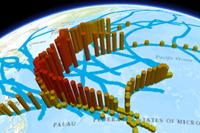

In [13]:
search_result = gis.content.search('title:Western Pacific Typhoons (2005) by esri_3d', 
                                   item_type = 'Web Scene')
web_scene_item = search_result[0]
web_scene_item

Lets display the web scene in the notebook.

In [14]:
web_scene_obj = Scene(item=web_scene_item)
web_scene_obj

Scene(camera={'heading': 0.0, 'position': {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': -137…


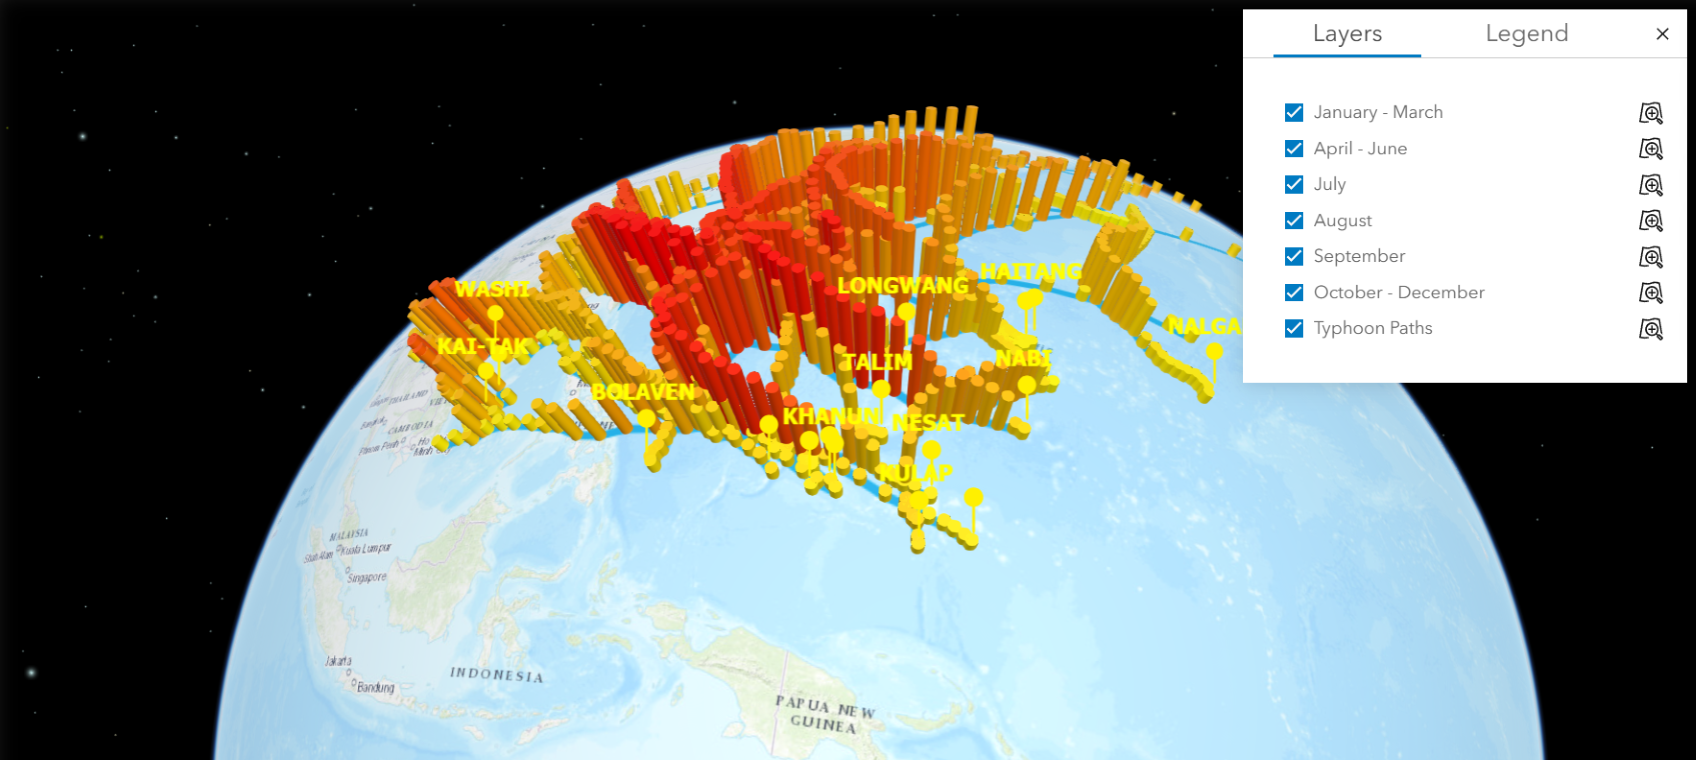

In [43]:
web_scene_obj = Scene(item=web_scene_item)
web_scene_obj

This is a great web scene and it displays a lot of hurricane tracks. However, we want to create a new one with only a particular subset of data and customize the basemaps. To modify this web scene, let us first make a copy of it and publish it into your portal.

## Make a copy of the public web scene item
Let's say, we are only interested in the storms that occur in summer. Summer in tropical Asia is around April-June and that matches with a layer in the existing web scene. We will use the `layers` property of `SceneContent` class to understand how the layers look like.

### Update layers of new web scene

In [15]:
layers_list = web_scene_obj.content.layers
layers_list

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/18">,
 Group Layer: October - December,
 Group Layer: September,
 Group Layer: August,
 Group Layer: July,
 Group Layer: April - June,
 Group Layer: January - March]

If you notice, some of the layers above are group layers, meaning, they contain sub layers.

We are only interested in the layers that correspond to cyclones in summer. We will remove the layers except the `April-June` layer using the `remove()` method

In [16]:
web_scene_obj.content.remove(1)
web_scene_obj.content.remove(1)
web_scene_obj.content.remove(1)
web_scene_obj.content.remove(1)
web_scene_obj.content.remove(2)

True

In the cell below we see that there is only two layers the basemap layer and the `April-June` layer 

In [25]:
web_scene_obj.content.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/18">,
 Group Layer: April - June]

In [26]:
new_web_scene_obj = web_scene_obj

In [27]:
new_web_scene_obj.content.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/18">,
 Group Layer: April - June]

### Update basemap of new web scene
We now have the necessary `layers` information. Let us also try to change the basemap to a darker shade. 

**Basemaps** are web maps that are stored in a **group** usually called **Basemaps**. We will be using 3d basemaps for scenes, which we will get using the property called `basemaps3d` of `BasemapManager` class

In [28]:
new_web_scene_obj.basemap.basemap

{'baseMapLayers': [{'id': '73e9780a7d6f413f8547abbd19ec786c',
   'layerType': 'ArcGISTiledMapServiceLayer',
   'listMode': 'show',
   'opacity': 1.0,
   'refreshInterval': 0.0,
   'title': 'World Topo Map',
   'url': 'https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer',
   'visibility': True}],
 'title': 'Topographic'}

In [32]:
new_web_scene_obj.basemap.basemaps3d

['topo-3d',
 'navigation-3d',
 'streets-3d',
 'osm-3d',
 'gray-3d',
 'navigation-dark-3d',
 'streets-dark-3d',
 'dark-gray-3d']

In [35]:
new_web_scene_obj.basemap.basemap = 'gray-3d'

In [36]:
new_web_scene_obj.basemap.basemap

{'baseMapLayers': [{'id': 'gray-3d-base-layer',
   'layerType': 'VectorTileLayer',
   'opacity': 1.0,
   'styleUrl': 'https://www.arcgis.com/sharing/rest/content/items/01a14b466345455ba4176d2e6390db92/resources/styles/root.json',
   'title': 'Streets',
   'visibility': True}],
 'title': 'Gray 3D'}

Now that we have performed the necessary updates, we can go ahead and publish this as a new web scene item on our portal. We will use the `save()` method of the `Scene` class to create a new `Scene`. Previously we used the `update()` method to update the web map which updates the existing web map as opposed to creating a new web map

In [59]:
web_scene_data_item_prop = {'title':'Tropical Cyclones - Summer',
                          'tags' : 'ArcGIS Python API',
                          'snippet' : str.format('Subset of <a href={2}>{0}</a> published by {1}',
                                                 web_scene_item.title, web_scene_item.owner,
                                                "https://www.arcgis.com/home/item.html?id=" + web_scene_item.id),
                           }



In [60]:
web_scene_data_item = new_web_scene_obj.save(item_properties=web_scene_data_item_prop)
web_scene_data_item

<Item title:"Tropical Cyclones - Summer" type:Web Scene owner:python_user>

We have successfully published the new web scene. Now let us display in an interactive widget and observe if it has the necessary updates.


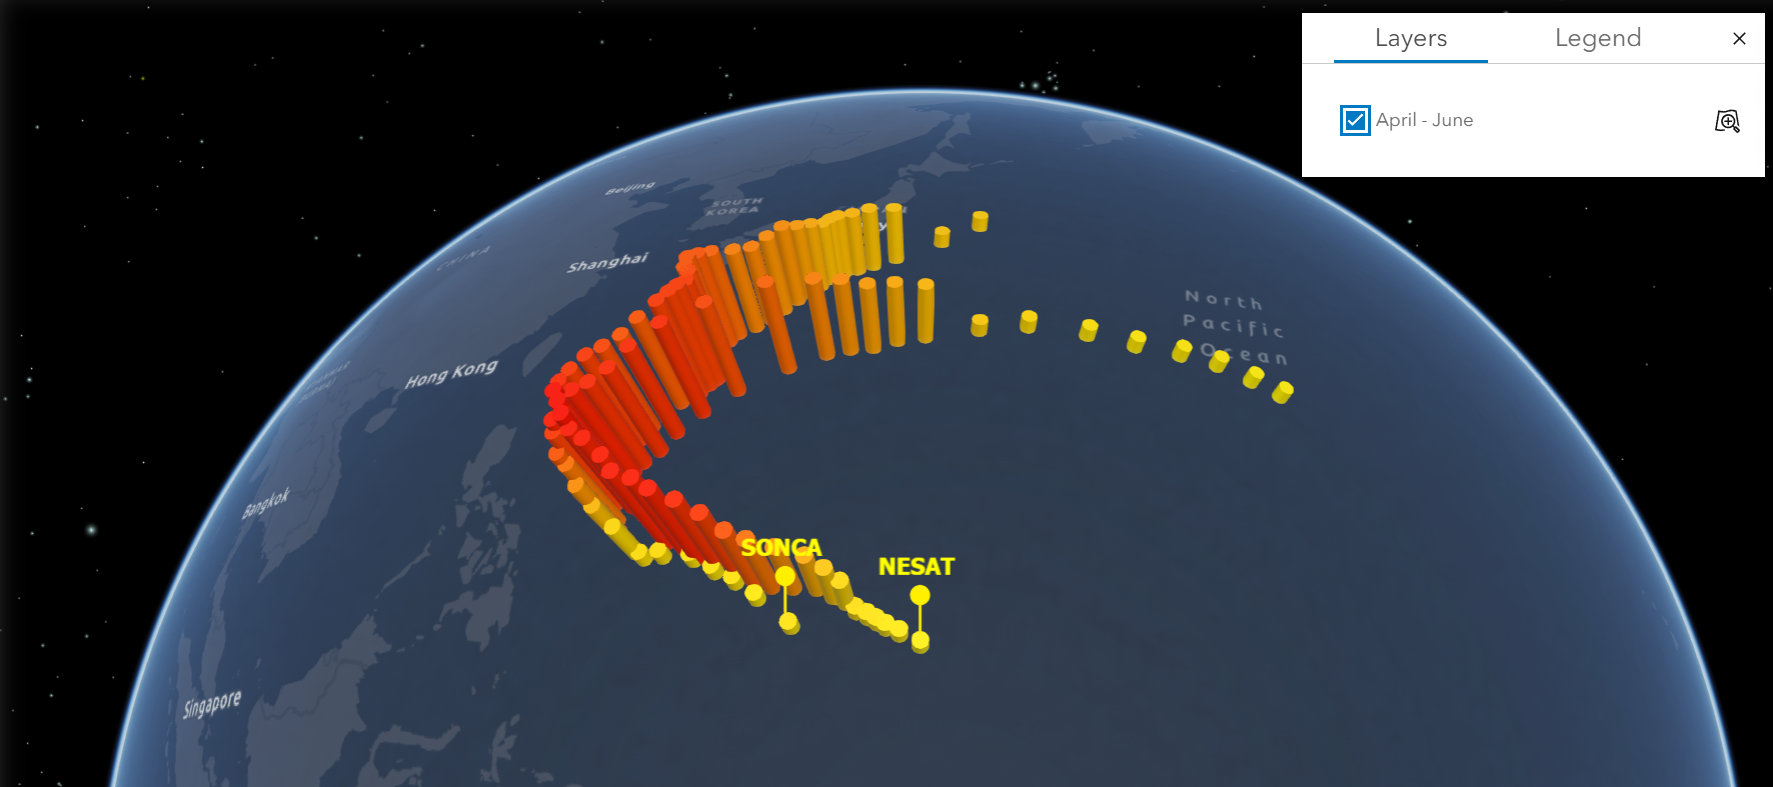

In [56]:
new_web_scene_obj = Scene(item = web_scene_data_item)
new_web_scene_obj

# Summary
In this sample, we observed how to consume web maps, web scenes and how to update and save them. During this process, the sample showed how to read web feature layers, how to modify the map widget using code, how to delete layers of a Scene and how to look for and set 3d basemaps